In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("data/sign_mnist_train.csv")
d_test = pd.read_csv("data/sign_mnist_test.csv")
X_train = df.iloc[:,1:785].values
y_train = df.iloc[:,0].values
X_test = d_test.iloc[:,1:785].values
y_test = d_test.iloc[:,0].values

plt.figure(figsize=(15,15))
# plot 40 pictures
for i in range(0,40):
    plt.subplot(9,10,i + 1)
    # reshape from 1d to 2d pixel array
    grid_data = df.iloc[i,1:785].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation = "bicubic", cmap = "afmhot")
    # hide x, y axes
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

/Users/shipra/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:

# Normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

/Users/shipra/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


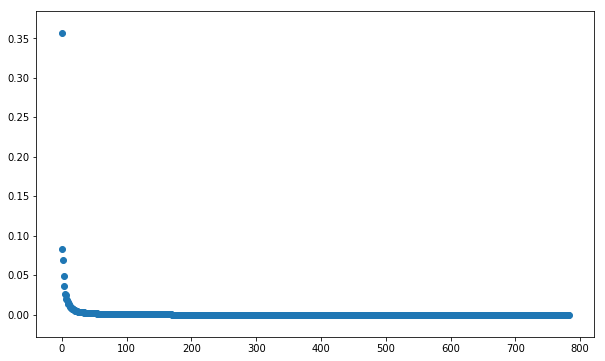

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
#plt.title("Single Variable's Exlained Variance")

Text(0.5, 1.0, "Cumulative Variable's Exlained Variance")

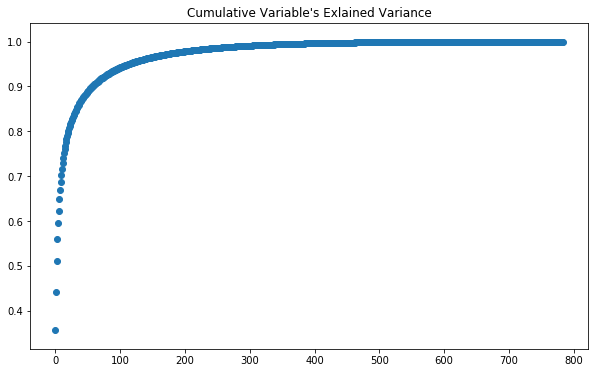

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

In [6]:
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=40).fit(X_std)
pca.explained_variance_ratio_

array([0.35728384, 0.08348417, 0.06975836, 0.04894734, 0.03678049,
       0.02656069, 0.02550446, 0.02033958, 0.01818031, 0.01611878,
       0.01371407, 0.0130344 , 0.01121425, 0.01014984, 0.0090039 ,
       0.00817253, 0.00751541, 0.00713299, 0.00680402, 0.0059812 ,
       0.00558619, 0.00507844, 0.00489826, 0.0047318 , 0.00433886,
       0.00403222, 0.00390426, 0.00362656, 0.00343454, 0.00340129,
       0.00322644, 0.00316155, 0.003074  , 0.00294577, 0.0028419 ,
       0.00278768, 0.00263178, 0.00260241, 0.00250392, 0.0024634 ])

In [7]:
# Transform to images
#pca.components_.shape[0]
eigen_40 = pca.components_.reshape(n_components,28, 28)

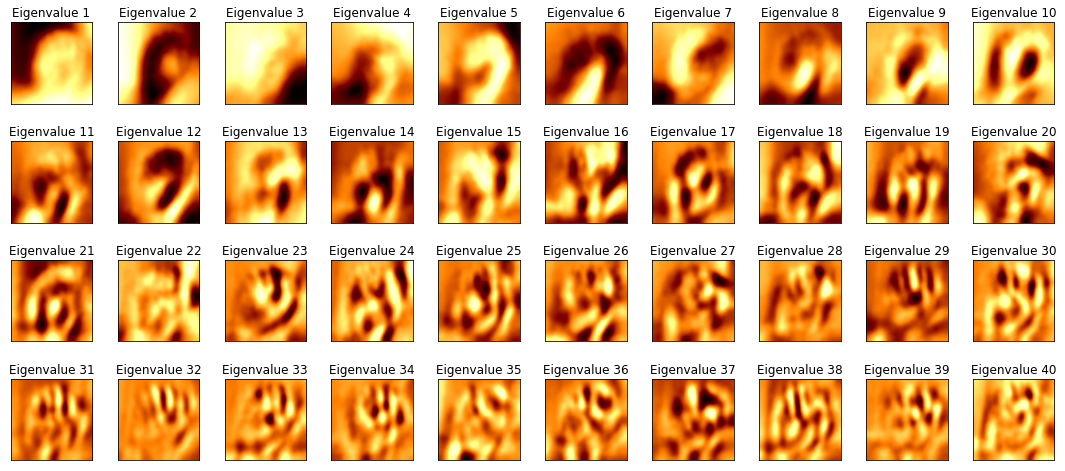

In [8]:
# Plot the first 40 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(40)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_40[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

In [9]:
data_sample = df

In [10]:
X_Train_Sample = data_sample.iloc[:,1:785].values

In [11]:
pca_std = StandardScaler().fit_transform(X_Train_Sample)

# Call the PCA method with 2 components. 
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)

/Users/shipra/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


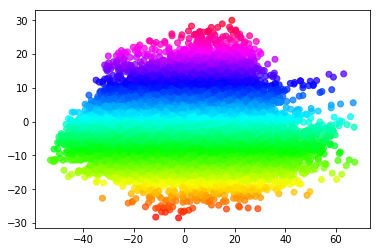

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
from collections import defaultdict
x = x_2[:,0]
y = x_2[:,1]
colors = y 



fig = plt.figure()
c = plt.scatter(x, y, c=colors, cmap='hsv', alpha=0.75)

In [18]:
from sklearn.cluster import KMeans
kmeans_with_pca = KMeans(n_clusters=24).fit(x_2)